<center><h3>Het Monpara</h3></center>
<center><h3>202511016</h3></center>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [37]:
x = np.linspace(-3, 3, 100)
f_x = x**3 - x**2 + x + 2
print("x values:\n", x)
print("\nTrue function f(x):\n", f_x)


x values:
 [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90

In [38]:
noisy_datasets = []
for k in range(10):
    noise = np.random.normal(0, 0.1, size=100)
    y = f_x + noise
    noisy_datasets.append(y)

print("Number of noisy datasets:", len(noisy_datasets))
print("Example first noisy dataset:\n", noisy_datasets[0])


Number of noisy datasets: 10
Example first noisy dataset:
 [-37.03631167 -35.17664796 -33.06276546 -31.17331172 -29.26765763
 -27.65723684 -25.74272607 -24.49038213 -22.62083806 -21.28989997
 -19.7584637  -18.47350133 -17.06335474 -15.96930914 -14.84979582
 -13.46200667 -12.53295532 -11.46909273 -10.38817019  -9.68465753
  -8.63981368  -7.9230015   -7.08729101  -6.32098537  -5.7751161
  -5.04126406  -4.20662964  -3.67020883  -3.21958171  -2.67955832
  -2.25857526  -1.6521648   -1.39858661  -0.97681579  -0.53623039
  -0.40745304   0.12056712   0.08066842   0.64166305   0.66370915
   0.87761398   0.89375492   1.19944915   1.28575694   1.45775388
   1.61887597   1.82911806   1.84281003   1.9308428    1.85919893
   1.94133717   2.26326844   2.05851652   2.34229111   2.19432649
   2.25948805   2.40692243   2.46903748   2.37540064   2.39629827
   2.48351389   2.5835634    2.70757376   2.69689181   2.84706825
   3.04974743   3.03813096   3.15994621   3.12169881   3.17268957
   3.65547224   3.

In [39]:
linear_predictions = []
x_reshaped = x.reshape(-1, 1)

for y in noisy_datasets:
    model = LinearRegression()
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    linear_predictions.append(y_pred)

print("Linear model predictions for first dataset:\n", linear_predictions[0])


Linear model predictions for first dataset:
 [-20.57759179 -20.18333686 -19.78908194 -19.39482701 -19.00057209
 -18.60631716 -18.21206223 -17.81780731 -17.42355238 -17.02929745
 -16.63504253 -16.2407876  -15.84653267 -15.45227775 -15.05802282
 -14.66376789 -14.26951297 -13.87525804 -13.48100312 -13.08674819
 -12.69249326 -12.29823834 -11.90398341 -11.50972848 -11.11547356
 -10.72121863 -10.3269637   -9.93270878  -9.53845385  -9.14419892
  -8.749944    -8.35568907  -7.96143415  -7.56717922  -7.17292429
  -6.77866937  -6.38441444  -5.99015951  -5.59590459  -5.20164966
  -4.80739473  -4.41313981  -4.01888488  -3.62462995  -3.23037503
  -2.8361201   -2.44186518  -2.04761025  -1.65335532  -1.2591004
  -0.86484547  -0.47059054  -0.07633562   0.31791931   0.71217424
   1.10642916   1.50068409   1.89493901   2.28919394   2.68344887
   3.07770379   3.47195872   3.86621365   4.26046857   4.6547235
   5.04897843   5.44323335   5.83748828   6.23174321   6.62599813
   7.02025306   7.41450798   7.80

In [40]:
linear_predictions_array = np.array(linear_predictions)
mean_linear_pred = np.mean(linear_predictions_array, axis=0)
bias_linear = np.mean((mean_linear_pred - f_x)**2)
variance_linear = np.mean(np.var(linear_predictions_array, axis=0))
print("Linear Model Bias:", bias_linear)
print("Linear Model Variance:", variance_linear)


Linear Model Bias: 25.165421646409563
Linear Model Variance: 0.00013160344221831426


In [41]:
poly_predictions = []
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x_reshaped)

for y in noisy_datasets:
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    poly_predictions.append(y_pred)

print("Polynomial model predictions for first dataset:\n", poly_predictions[0])


Polynomial model predictions for first dataset:
 [-37.08053558 -35.03890704 -33.07150492 -31.17683607 -29.35341427
 -27.59976013 -25.91440089 -24.29587035 -22.74270866 -21.25346225
 -19.82668364 -18.46093131 -17.1547696  -15.9067685  -14.71550359
 -13.57955583 -12.49751147 -11.4679619  -10.48950347  -9.56073742
  -8.6802697   -7.84671082  -7.05867574  -6.31478371  -5.61365816
  -4.95392651  -4.33422008  -3.75317392  -3.2094267   -2.70162054
  -2.22840088  -1.78841635  -1.38031863  -1.0027623   -0.6544047
  -0.33390583  -0.03992813   0.22886357   0.47380225   0.6962188
   0.89744221   1.07879965   1.24161664   1.3872172    1.51692395
   1.6320583    1.73394055   1.82389004   1.9032253    1.97326418
   2.03532397   2.09072159   2.14077368   2.18679676   2.23010737
   2.27202219   2.31385822   2.35693288   2.40256416   2.45207077
   2.50677227   2.56798921   2.63704328   2.71525741   2.80395598
   2.90446487   3.0181117    3.14622586   3.29013876   3.45118386
   3.63069692   3.83001604   

In [42]:
poly_predictions_array = np.array(poly_predictions)
mean_poly_pred = np.mean(poly_predictions_array, axis=0)
bias_poly = np.mean((mean_poly_pred - f_x)**2)
variance_poly = np.mean(np.var(poly_predictions_array, axis=0))
print("Polynomial Model Bias:", bias_poly)
print("Polynomial Model Variance:", variance_poly)


Polynomial Model Bias: 6.41005078245502e-05
Polynomial Model Variance: 0.0004718893514293381


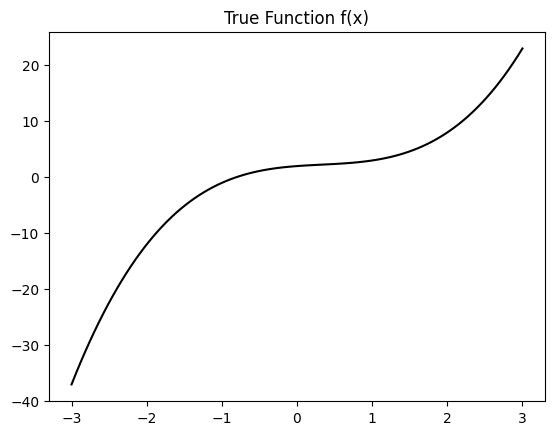

In [43]:
plt.plot(x, f_x, color='black')
plt.title("True Function f(x)")
plt.show()


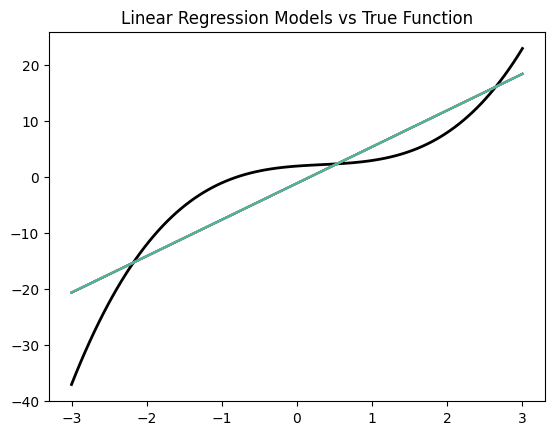

In [44]:
plt.plot(x, f_x, color='black', linewidth=2)
for y_pred in linear_predictions:
    plt.plot(x, y_pred, alpha=0.7)
plt.title("Linear Regression Models vs True Function")
plt.show()


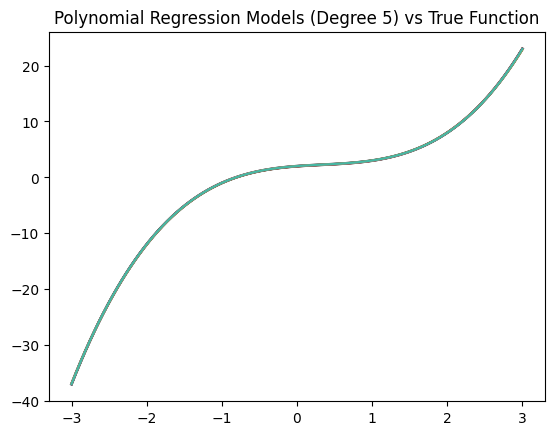

In [45]:
plt.plot(x, f_x, color='black', linewidth=2)
for y_pred in poly_predictions:
    plt.plot(x, y_pred, alpha=0.7)
plt.title("Polynomial Regression Models (Degree 5) vs True Function")
plt.show()
